# <span style='color:darkgreen'> Python for Data Analysis</span>
In this notebook, we will look into how to analyze data in Python using different libraries, including `pandas`, `numpy`, `matplotlib`, `seaborn`

We will look into different steps in analysing the data,
- **STEP 1**: starting from **data acquisition or import**,
- **STEP 2**: then doing **pre-processing** of the data,
- **STEP 3**: then doing **exploratory data analysis** to understand more about the data and different ways to **visualize** the outcome.
- **STEP 4**: Lastly, let's build a simple **ML model** for **predicting** the car price.

<hr>

## **<span style='color:darkred'>Machine Learning</span>**
In Python, machine learning can be implemented using the `scikit-learn` library. https://scikit-learn.org/stable/

<img src='https://scikit-learn.org/1.3/_static/ml_map.png' width=800px>


## **<span style='color:darkred'>STEP 4. Predicting the Car Price</span>**
Now, let's build a machine learning model using the cleaned data to predict the car price based on the given features of the car.

In general, to build a machine learning models, there are several steps:
1. Data preparation: even though our data is clean, but we still have to prepared the data in the way that it can be read by the algorithm.
2. Split the data into training and testing data.
3. Train the model using the training data.
4. Get the performance of the trained model using the testing data.

Let's import back the data that have been cleaned in previous section.


In [4]:
import pandas as pd

automobile_cleaned = pd.read_csv('automobile_cleaned.csv')

automobile_cleaned.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,horsepower-binned,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,13495.0,Low,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,16500.0,Low,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,16500.0,Medium,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,13950.0,Low,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,17450.0,Low,13.055556,10.681818


### **<em style='color:darkred'>4.1 Data Preparation</em>**

#### **<em style='color:darkred'>4.1.1 Data Encoding</em>**
First is **data encoding**, there are many categorical data that appears as text and these columns must be transformed to numerical. One of the way is to perform data encoding, that encodes the text into numerical values.

##### **<span style='color:darkred'>One-Hot Encoding</span>**
**One-Hot Encoding** is a technique used in machine learning and data preprocessing to convert categorical variables into numerical format that can be fed into algorithms. It's particularly useful for features with many unique categories.

In [6]:
def get_one_hot(data, col):
    res = pd.get_dummies(data[col], dtype=int)
    res.astype(int)
    return res

In [7]:
categorical_columns = automobile_cleaned.dtypes[(automobile_cleaned.dtypes=='object')]
categorical_columns = categorical_columns.index.values
print(categorical_columns)

['make' 'fuel-type' 'aspiration' 'num-of-doors' 'body-style'
 'drive-wheels' 'engine-location' 'engine-type' 'num-of-cylinders'
 'fuel-system' 'horsepower-binned']


In [8]:
automobile_prep = automobile_cleaned.copy()

for col in categorical_columns:
    one_hot = get_one_hot(automobile_prep, col)
    automobile_prep = pd.concat([automobile_prep, one_hot], axis=1)
    automobile_prep.drop(col, axis=1, inplace=True)

In [9]:
automobile_features = automobile_prep.drop('price', axis=1)
automobile_features

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,High,Low,Medium
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,1,0,0,0,1,0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,1,0,0,0,1,0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,1,0,0,0,0,1
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,1,0,0,0,1,0
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,1,0,0,0,0,1
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,1,0,0,0,0,1
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,1,0,0,0,0,0,1,0


In [10]:
automobile_target = automobile_prep['price']
automobile_target

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder

automobile_prep_le = automobile_cleaned.copy()
automobile_prep_le.drop('price', axis=1, inplace=True)

encoder = LabelEncoder()

for col in categorical_columns:
    automobile_prep_le[col] = encoder.fit_transform(automobile_prep_le[col])

In [12]:
automobile_prep_le

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,horsepower-binned,city-L/100km,highway-L/100km
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,1,11.190476,8.703704
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,1,11.190476,8.703704
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,2,12.368421,9.038462
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,1,9.791667,7.833333
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,1,13.055556,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114.0,5400.0,1,10.217391,8.392857
197,-1,95.0,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160.0,5300.0,2,12.368421,9.400000
198,-1,95.0,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134.0,5500.0,2,13.055556,10.217391
199,-1,95.0,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106.0,4800.0,1,9.038462,8.703704


#### **<em style='color:darkred'>4.1.2 Data Normalization</em>**
Now we have all the numerical values in our dataset, however, the scale of the values can be varies in scale and that could lead to bias. Thus in this case, we will extract the features (except the target column `price` and normalize them using standard scaler) Here we will use the `scikit-learn` library.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
automobile_features_scaled = scaler.fit_transform(automobile_features)

In [15]:
automobile_features_scaled

array([[ 1.72504964,  0.        , -1.6851071 , ..., -0.15971914,
         0.56011203, -0.5216818 ],
       [ 1.72504964,  0.        , -1.6851071 , ..., -0.15971914,
         0.56011203, -0.5216818 ],
       [ 0.1271926 ,  0.        , -0.71010295, ..., -0.15971914,
        -1.78535711,  1.91687731],
       ...,
       [-1.47066444, -0.84595589,  1.70261919, ..., -0.15971914,
        -1.78535711,  1.91687731],
       [-1.47066444, -0.84595589,  1.70261919, ..., -0.15971914,
         0.56011203, -0.5216818 ],
       [-1.47066444, -0.84595589,  1.70261919, ..., -0.15971914,
         0.56011203, -0.5216818 ]])

In [16]:
scaler = StandardScaler()
automobile_features_le_scaled = scaler.fit_transform(automobile_prep_le)

In [17]:
automobile_features_le_scaled

array([[ 1.72504964,  0.        , -1.97171697, ..., -0.41953749,
         0.49295471,  0.35876453],
       [ 1.72504964,  0.        , -1.97171697, ..., -0.41953749,
         0.49295471,  0.35876453],
       [ 0.1271926 ,  0.        , -1.97171697, ...,  1.799595  ,
         0.95886113,  0.54107923],
       ...,
       [-1.47066444, -0.84595589,  1.39503761, ...,  1.799595  ,
         1.23063987,  1.18314403],
       [-1.47066444, -0.84595589,  1.39503761, ..., -0.41953749,
        -0.35822047,  0.35876453],
       [-1.47066444, -0.84595589,  1.39503761, ..., -0.41953749,
         0.95886113,  0.7379791 ]])

### **<em style='color:darkred'>4.2 Data Splitting</em>**
Before start the model training, we need to split our data into Training and Testing Set. Training set is the data that used by the algorithm to search for interesting patterns that able to be used to classify the differentypes of species.

**Steps:**
1. Load the `model_selection` module from the `scikit-learn` library
2. Then split the data into train and test set using the `train_test_split()` function.  The input parameters for the function is as follows:
   
   `train_test_split( iris_data, target, test_size=0.2, random_state=1 )`
   
   where `test_size` refers to the percentage of the testing set (0.2 --> 20% test 80% train)
4. This function will return 4 variables, which are train data, test data, train labels, test labels respectively.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(automobile_features_le_scaled, automobile_target, test_size=0.3, random_state=1)

In [20]:
X_train.shape

(140, 26)

In [21]:
X_test.shape

(61, 26)

### **<em style='color:darkred'>4.3 Model Training</em>**

Now, using the same dataset, let's continue and work further on Step 5-6 and train different classification models using different methods.
- Decision tree
- Random forest
- K-nearest neighbours
#### **<em style='color:darkred'>4.3.1 Decision Tree</em>**
To train a Decision Tree classification model in `python`, first need to import the corresponding library of `DecisionTreeRegressor()` from the `tree` module in `sklearn` library

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor()

#### **<em style='color:darkred'>4.3.2 Random Forest</em>**
To train a Decision Tree classification model in `python`, first need to import the corresponding library of `RandomForestRegressor()` from the `ensemble` module in `sklearn` library

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

#### **<em style='color:darkred'>4.3.3 K-Nearest Neighbour</em>**
To train a Decision Tree classification model in `python`, first need to import the corresponding library of `KNeighborsRegressor()` from the `neighbors` module in `sklearn` library

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, Y_train)

KNeighborsRegressor()

### **<em style='color:darkred'>4.4 Model Evaluation</em>**
To test the trained model in `python`, we will use the variable and call the `predict()` function and pass in the testing data (just the testing data, without the target). This will generate a list of predicted target values (the price) for the testing data from the model.

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math

def get_evaluation(model,name, Xtest, Ytest):

    prediction = model.predict(Xtest)
    error = mean_squared_error(Ytest, prediction)
    print("Mean Squared Error: ", error)
    print("Root Mean Squared Error: ", math.sqrt(error))

    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111)
    plt.plot(range(61), Ytest, label='true')
    plt.plot(range(61), prediction, label='predicted')

    ax.legend()
    ax.set_xlabel('test samples')
    ax.set_ylabel('price')
    ax.set_title("Comparison of Predicted vs Truth for "+name+" model")

    return error

Mean Squared Error:  7629958.344262295
Root Mean Squared Error:  2762.2379231815453


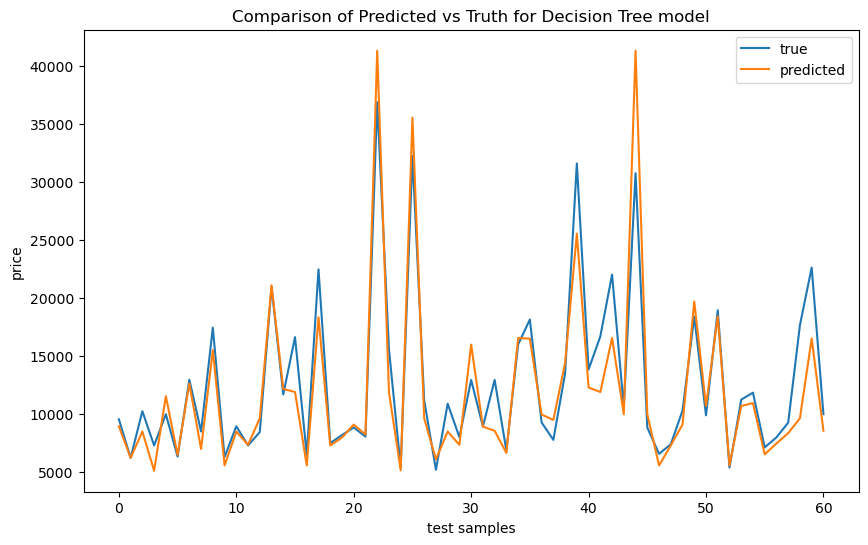

In [30]:
dt_error = get_evaluation(dt_model,"Decision Tree", X_test, Y_test)

Mean Squared Error:  6151724.100036478
Root Mean Squared Error:  2480.266941286054


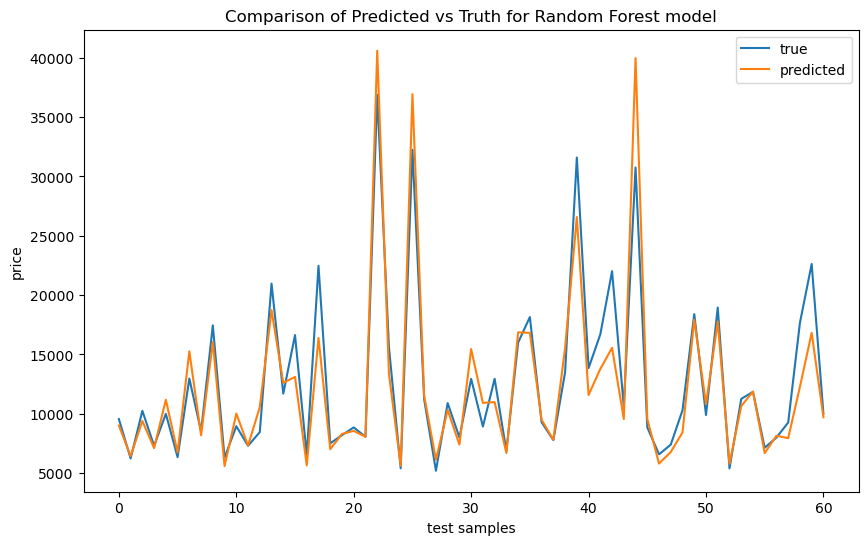

In [31]:
rf_error = get_evaluation(rf_model,"Random Forest", X_test, Y_test)

Mean Squared Error:  10881482.78032787
Root Mean Squared Error:  3298.70925974507


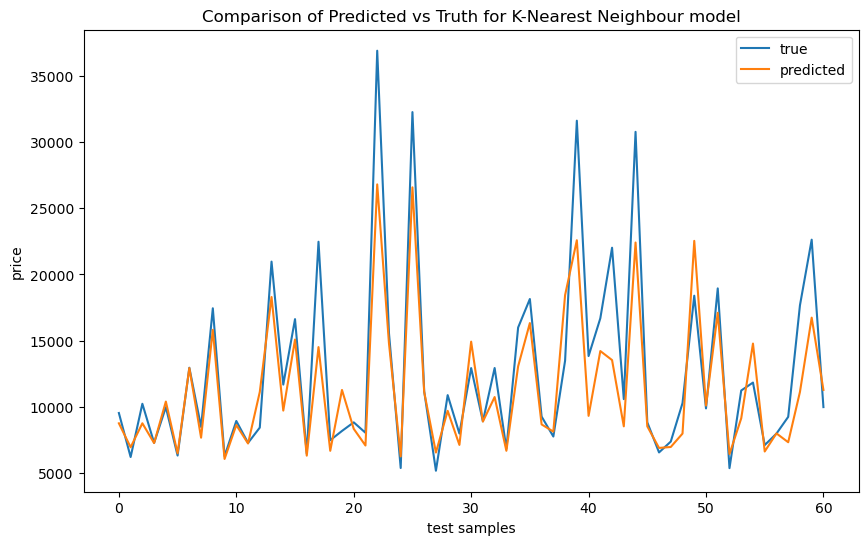

In [32]:
knn_error = get_evaluation(knn_model,"K-Nearest Neighbour", X_test, Y_test)